In [4]:
%pip install -U -q open-deep-research #! works in terminal not in jupyter notebook


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


above: installing open deep research
below: import open deep research

In [5]:
import open_deep_research   
print(open_deep_research.__version__) 

0.0.15


first line: only needed for jupyter
other 3 just importing functionalities 

In [6]:
from IPython.display import Image, display
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

initiate memory and compiling graph
display is a jupyter notebook command
mermaid is just something people use to draw 

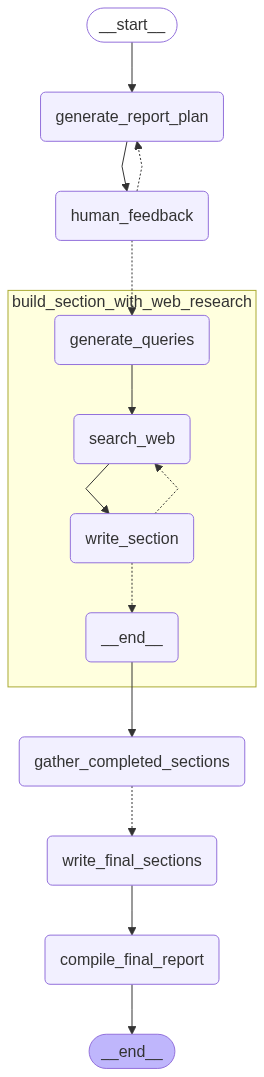

In [7]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

more imports 
set environment variable
groq (recommended since free yippee)

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any model or search tool selections below, such as:
# _set_env("OPENAI_API_KEY")
# _set_env("ANTHROPIC_API_KEY")
# _set_env("TAVILY_API_KEY")
# _set_env("GROQ_API_KEY")
# _set_env("PERPLEXITY_API_KEY")

define report structure
threads: (second one uses groq)

In [9]:
import uuid 
from IPython.display import Markdown

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report"""

# Claude 3.7 Sonnet for planning with perplexity search
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "perplexity",
#                            "planner_provider": "anthropic",
#                            "planner_model": "claude-3-7-sonnet-latest",
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            "max_search_depth": 2,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# DeepSeek-R1-Distill-Llama-70B for planning and llama-3.3-70b-versatile for writing
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           # "search_api": "tavily",
                           "planner_provider": "groq",
                           "planner_model": "llama-3.3-70b-versatile",
                           "writer_provider": "groq",
                           "writer_model": "llama-3.3-70b-versatile",
                           "report_structure": REPORT_STRUCTURE,
                           "max_search_depth": 1,}
                           }

# # Fast config (less search depth) with o3-mini for planning and Claude 3.5 Sonnet for writing
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "o3-mini",
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            "max_search_depth": 1,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# Create a topic  (should not hardcode for us) (becomes input)
topic = input("input research topic here")
#find whether in feedback or not
feedback_status = 0
end_status = 0
# Run the graph until the interruption
async for event in graph.astream({"topic":topic}, thread, stream_mode="updates"):
   if '__interrupt__' in event:
      interrupt_value = event['__interrupt__'][0].value
      display(Markdown(interrupt_value))


APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.3-70b-versatile` in organization `org_01jvm4g19ye79b5d2ax2wmsvac` service tier `on_demand` on tokens per minute (TPM): Limit 12000, Requested 30287, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [ ]:
# Pass feedback to update the report plan   (part after resume shouldnt be hardcoded either, that is the feedback) (to figure: make sure  bot knows we are in feedback loop)
While feedback_status <= 5:
    feedback_status += 1 
    feedback = input("input feedback")
    if feedback == "nil":
        break 
    async for event in graph.astream(Command(resume=feedback), thread, stream_mode="updates"):
        if '__interrupt__' in event:
            interrupt_value = event['__interrupt__'][0].value
            display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: Provides a brief overview of the AI inference market, its relevance, and introduces the three key players: Fireworks, Together.ai, and Groq.
Research needed: No


Section: Fireworks AI Overview
Description: Covers Fireworks AI’s offerings in the inference market, including key performance metrics, product features, model quality, speed, and latency. Emphasizes revenue estimates (ARR) as part of its market positioning.
Research needed: Yes


Section: Together.ai Overview
Description: Explores Together.ai’s role within the AI inference space. Discusses product features, integration details, user reviews, and performance metrics along with ARR revenue estimates.
Research needed: Yes


Section: Groq AI Overview
Description: Examines Groq’s AI inference solutions with a focus on benchmark performance, inference speed, and cost efficiency. Includes an analysis of ARR revenue and how its technical performance shapes its market position.
Research needed: Yes


Section: Market Comparison and Trends
Description: Provides a comparative analysis highlighting the strengths, weaknesses, and differentiating factors of Fireworks, Together.ai, and Groq. Discusses trends like cost, performance metrics, and revenue (ARR) estimates.
Research needed: Yes


Section: Conclusion
Description: Summarizes key findings from the individual sections and the comparative analysis. Offers a concise distillation of the market landscape using a summary table or list to highlight major points including ARR insights.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

In [ ]:
# Pass True to approve the report plan (make string match thing) (add things to update user in front end about completion state)
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}


{'build_section_with_web_research': {'completed_sections': [Section(name='Groq AI Overview', description='Examines Groq’s AI inference solutions with a focus on benchmark performance, inference speed, and cost efficiency. Includes an analysis of ARR revenue and how its technical performance shapes its market position.', research=True, content="## Groq AI Overview\n\nGroq has emerged as a significant player in the AI inference market with its innovative Language Processing Unit (LPU) technology. Independent benchmarks from ArtificialAnalysis.ai demonstrate Groq's impressive performance, with their Llama 2 Chat (70B) API achieving 241 tokens per second - more than double the speed of competing providers [1]. Their total response time for 100 output tokens is just 0.8 seconds, positioning them as a leader in inference speed [2].\n\nThe company's core technology, the Tensor Streaming Processor (TSP), delivers 500-700 tokens per second on large language models, re

In [ ]:
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report) 

# AI Inference Market: Analysis of Fireworks, Together.ai, and Groq

The AI inference market is experiencing rapid evolution as companies compete to provide faster, more efficient solutions for deploying and managing AI models. This analysis examines three key players reshaping the landscape: Fireworks, Together.ai, and Groq. Each brings distinct advantages - Fireworks with its specialized features and security focus, Together.ai with its comprehensive platform and impressive growth trajectory, and Groq with its groundbreaking Language Processing Unit technology. As organizations increasingly rely on AI inference capabilities, understanding these providers' strengths and market positions becomes crucial for making informed deployment decisions.

## Fireworks AI Overview

Fireworks AI has established itself as a significant player in the AI inference market, offering a comprehensive platform for deploying and managing AI models. The company provides access to various high-performance models, including Llama 3.1 405B and Qwen2.5 Coder 32B, which represent their highest quality offerings [1]. Their platform demonstrates impressive performance metrics, with some models achieving speeds up to 300 tokens per second for serverless deployments [2].

The company has gained substantial market traction, recently securing $52 million in Series B funding that values the company at $552 million [3]. With an annual revenue of $6 million and a team of 60 employees, Fireworks AI serves notable clients including DoorDash, Quora, and Upwork [4, 5].

Their platform differentiates itself through specialized features like FP8 quantization for large models and continuous batching capabilities [6]. Fireworks claims to offer approximately 3x faster speeds compared to competitors like Hugging Face TGI when using the same GPU configuration [2]. The company focuses on providing smaller, production-grade models that can be deployed privately and securely, rather than generic mega models [5].

### Sources
[1] Fireworks: Models Intelligence, Performance & Price: https://artificialanalysis.ai/providers/fireworks
[2] Fireworks Platform Spring 2024 Updates: https://fireworks.ai/blog/spring-update-faster-models-dedicated-deployments-postpaid-pricing
[3] Fireworks AI Raises $52M in Series B Funding: https://siliconvalleyjournals.com/fireworks-ai-raises-52m-in-series-b-funding-to-expand-genai-inference-platform/
[4] Fireworks AI: Contact Details, Revenue, Funding: https://siliconvalleyjournals.com/company/fireworks-ai/
[5] Fireworks AI Valued at $552 Million After New Funding Round: https://www.pymnts.com/news/investment-tracker/2024/fireworks-ai-valued-552-million-dollars-after-new-funding-round/
[6] Inference performance - Fireworks AI Docs: https://docs.fireworks.ai/faq/models/inference/performance

## Together.ai Overview

Together.ai is a comprehensive AI acceleration platform that has quickly emerged as a significant player in the AI inference space since its founding in 2022 [1]. The platform enables developers to access over 200 AI models, offering high-performance inference capabilities with optimized infrastructure [2].

The company's Inference Engine, built on NVIDIA Tensor Core GPUs, delivers impressive performance metrics, achieving 117 tokens per second on Llama-2-70B-Chat models [3]. Their model offerings include high-quality options like Llama 3.3 70B Turbo and Llama 3.1 405B Turbo, with some models achieving sub-100ms latency [4].

Together.ai has demonstrated remarkable growth, with estimates suggesting $130M in annualized recurring revenue (ARR) in 2024, representing a 400% year-over-year increase [5]. The platform has received positive user feedback, maintaining a 4.8/5.0 rating based on 162 user reviews [6].

The company differentiates itself through competitive pricing and technical innovations, incorporating advanced features like token caching, load balancing, and model quantization [2]. Users particularly praise the platform's straightforward API, reliable performance, and competitive pricing compared to alternatives [7].

### Sources
[1] https://siliconvalleyjournals.com/company/together-ai/
[2] https://www.keywordsai.co/blog/top-10-llm-api-providers
[3] https://www.together.ai/blog/together-inference-engine-v1
[4] https://artificialanalysis.ai/providers/togetherai
[5] https://sacra.com/c/together-ai/
[6] https://www.featuredcustomers.com/vendor/together-ai
[7] https://www.trustpilot.com/review/together.ai

## Groq AI Overview

Groq has emerged as a significant player in the AI inference market with its innovative Language Processing Unit (LPU) technology. Independent benchmarks from ArtificialAnalysis.ai demonstrate Groq's impressive performance, with their Llama 2 Chat (70B) API achieving 241 tokens per second - more than double the speed of competing providers [1]. Their total response time for 100 output tokens is just 0.8 seconds, positioning them as a leader in inference speed [2].

The company's core technology, the Tensor Streaming Processor (TSP), delivers 500-700 tokens per second on large language models, representing a 5-10x improvement over Nvidia's latest data center GPUs [3]. This performance advantage has positioned Groq as a compelling alternative in the inference market, particularly for startups seeking cost-effective solutions [4].

With approximately 300 employees, 60% of whom are software engineers, Groq has evolved beyond hardware to become a comprehensive AI solutions provider [5]. The company is strategically positioned to capture a share of the growing inference chip market, which is projected to reach $48 billion by 2027 [6].

### Sources
[1] https://groq.com/artificialanalysis-ai-llm-benchmark-doubles-axis-to-fit-new-groq-lpu-inference-engine-performance-results/
[2] https://groq.com/inference/
[3] https://sacra.com/c/groq/
[4] https://venturebeat.com/ai/ai-chip-race-groq-ceo-takes-on-nvidia-claims-most-startups-will-use-speedy-lpus-by-end-of-2024/
[5] https://www.businessinsider.com/groq-nvidia-software-advantage-cuda-moat-challenge-inference-2024-12?op=1
[6] https://generativeaitech.substack.com/p/groq-and-its-impact-on-ai-inference

## Market Comparison and Trends

The AI inference market shows distinct positioning among key players Fireworks, Together.ai, and Groq. Fireworks AI differentiates itself through superior speed, leveraging its proprietary FireAttention inference engine for text, image, and audio processing, while maintaining HIPAA and SOC2 compliance for data privacy [1]. Together.ai has demonstrated remarkable growth, reaching an estimated $130M in annualized recurring revenue (ARR) in 2024, representing a 400% year-over-year increase [2].

Both Fireworks and Together.ai focus on providing high-quality open-source models that can compete with proprietary alternatives [1]. Pricing structures vary across providers, with model costs ranging from $0.20 to $3.00 per million tokens for different model sizes and capabilities [3]. Together.ai's business model benefits from GPU price commoditization, allowing them to maintain competitive token pricing while focusing on developer experience and reliable inference across diverse open-source models [2].

Groq distinguishes itself by offering quick access to various open-source AI models from major providers like Google, Meta, OpenAI, and Mistral through the OpenRouter API platform [4]. The market shows a trend toward comprehensive platform offerings, with providers competing on factors such as model variety, inference speed, and specialized features for different use cases.

### Sources
[1] Top 10 AI Inference Platforms in 2025: Comparing LLM API Providers: https://www.helicone.ai/blog/llm-api-providers
[2] Together AI revenue, valuation & growth rate | Sacra: https://sacra.com/c/together-ai/
[3] Models Leaderboard : Comparison of AI Models & API Providers - Groq AI: https://groq-ai.com/models/
[4] Pricing: Compare Groq API Pricing With Other API Providers: https://groq-ai.com/pricing/

## Conclusion

The AI inference market shows clear differentiation among key players, with each provider carving out unique value propositions. Together.ai leads in revenue growth with $130M ARR, while Fireworks AI demonstrates strong potential with its recent $552M valuation. Groq distinguishes itself through superior inference speeds, achieving up to 700 tokens per second with its LPU technology.

| Metric | Fireworks | Together.ai | Groq |
|--------|-----------|-------------|------|
| ARR | $6M | $130M | Not disclosed |
| Speed (tokens/sec) | Up to 300 | Up to 117 | 500-700 |
| Key Differentiator | FP8 quantization | 200+ model access | LPU technology |
| Notable Feature | 3x faster than competitors | Token caching | Sub-second response |
| Target Market | Enterprise security | Developer platforms | Startup solutions |

The market trends indicate a shift toward comprehensive platform offerings that balance speed, cost-efficiency, and model variety. As the inference chip market approaches $48B by 2027, providers focusing on specialized hardware solutions and optimized infrastructure will likely gain competitive advantages. Success will depend on maintaining the delicate balance between performance, pricing, and platform features while addressing growing enterprise demands for security and reliability.